**Metadata exploration**

In [53]:
import pandas as pd

metadata = pd.read_csv("sample_info.csv")
expression_data = pd.read_csv('CCLE_expression.csv', header=0)



In [5]:
metadata.columns

Index(['DepMap_ID', 'cell_line_name', 'stripped_cell_line_name', 'CCLE_Name',
       'alias', 'COSMICID', 'sex', 'source', 'RRID', 'WTSI_Master_Cell_ID',
       'sample_collection_site', 'primary_or_metastasis', 'primary_disease',
       'Subtype', 'age', 'Sanger_Model_ID', 'depmap_public_comments',
       'lineage', 'lineage_subtype', 'lineage_sub_subtype',
       'lineage_molecular_subtype', 'culture_type'],
      dtype='object')

In [6]:
metadata.shape

(1829, 22)

In [43]:
print (metadata.head())

    DepMap_ID cell_line_name stripped_cell_line_name  \
0  ACH-000001    NIH:OVCAR-3               NIHOVCAR3   
1  ACH-000002          HL-60                    HL60   
2  ACH-000003          CACO2                   CACO2   
3  ACH-000004            HEL                     HEL   
4  ACH-000005     HEL 92.1.7                 HEL9217   

                                    CCLE_Name          alias  COSMICID  \
0                             NIHOVCAR3_OVARY         OVCAR3  905933.0   
1     HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE            NaN  905938.0   
2                       CACO2_LARGE_INTESTINE  CACO2, CaCo-2       NaN   
3      HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE            NaN  907053.0   
4  HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE            NaN       NaN   

      sex source       RRID  WTSI_Master_Cell_ID  ...  \
0  Female   ATCC  CVCL_0465               2201.0  ...   
1  Female   ATCC  CVCL_0002                 55.0  ...   
2    Male   ATCC  CVCL_0025                  Na

In [10]:
total_cell_lines = metadata["cell_line_name"].shape[0]
unique_cell_lines = metadata["cell_line_name"].nunique()

print ("The number of cell lines is",total_cell_lines)
print ("The number of the unique cell lines is",unique_cell_lines)

The number of cell lines is 1829
The number of the unique cell lines is 1735


In [16]:
gender = metadata['sex'].value_counts()
males = gender['Male']
females = gender['Female']
unknowngender = ['Unknown']

In [17]:
gender

sex
Male       770
Female     614
Unknown    445
Name: count, dtype: int64

In [18]:
import matplotlib.pyplot as plt

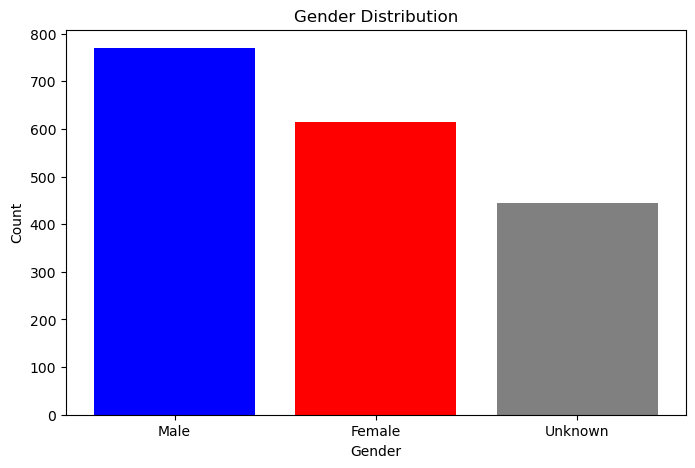

In [20]:
plt.figure(figsize=(8, 5))
plt.bar(gender.index, gender.values, color=['blue', 'red', 'gray'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

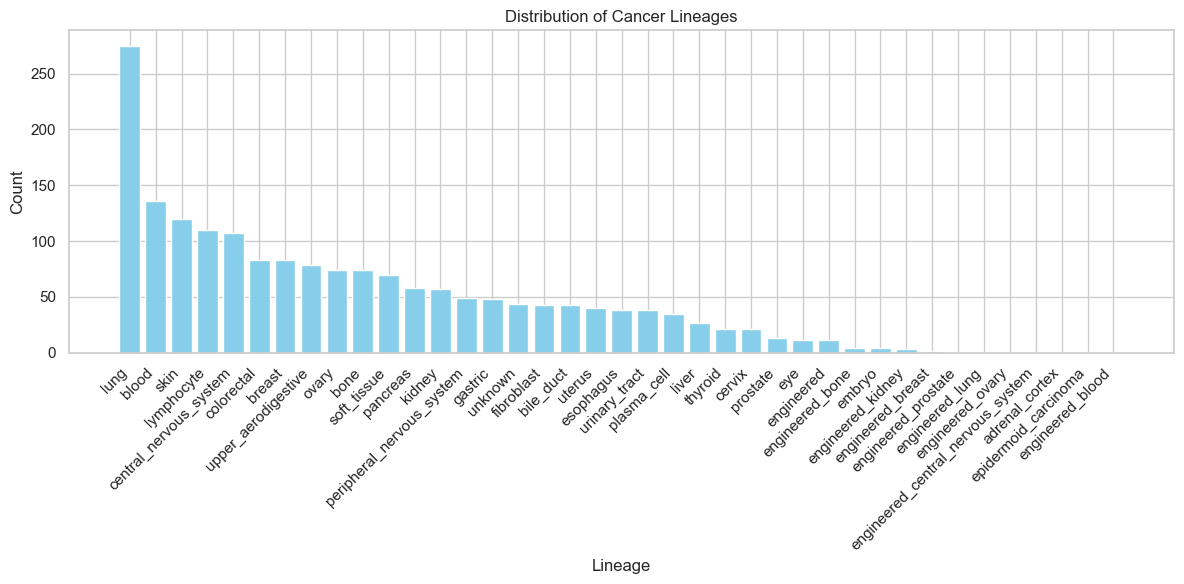

In [25]:
lineage_counts = metadata['lineage'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(lineage_counts.index, lineage_counts.values, color='skyblue')
plt.title("Distribution of Cancer Lineages")
plt.xlabel("Lineage")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

In [22]:
import seaborn as sns

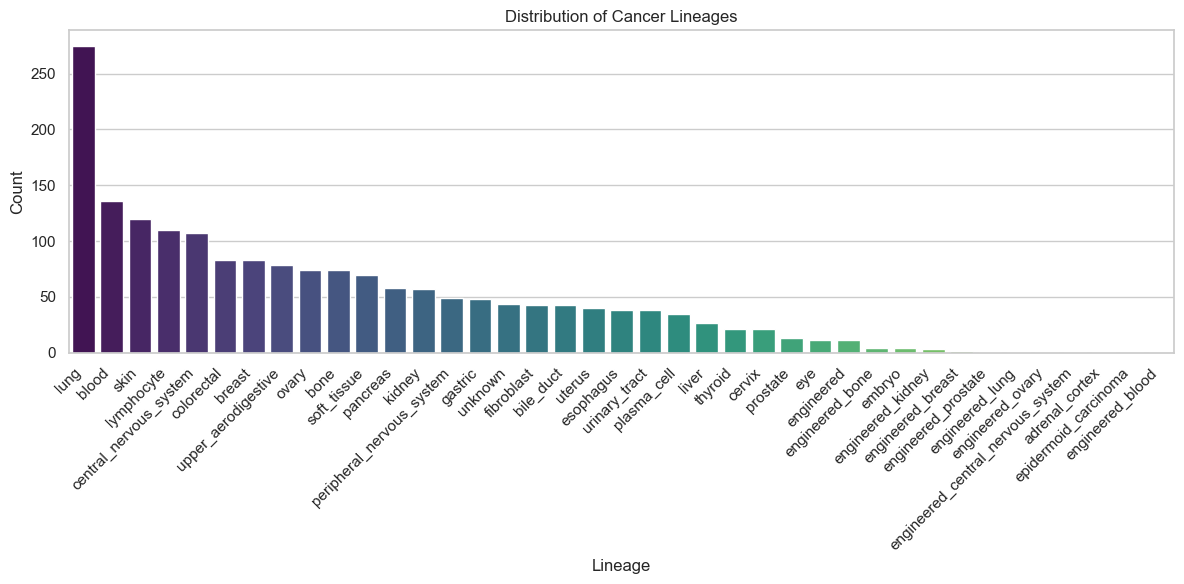

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  
sns.barplot(x=lineage_counts.index, y=lineage_counts.values, palette="viridis")
plt.title("Distribution of Cancer Lineages")
plt.xlabel("Lineage")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

In [36]:
c_type = metadata['primary_or_metastasis'].value_counts()
c_type

primary_or_metastasis
Primary       664
Metastasis    505
Unknown         1
Name: count, dtype: int64

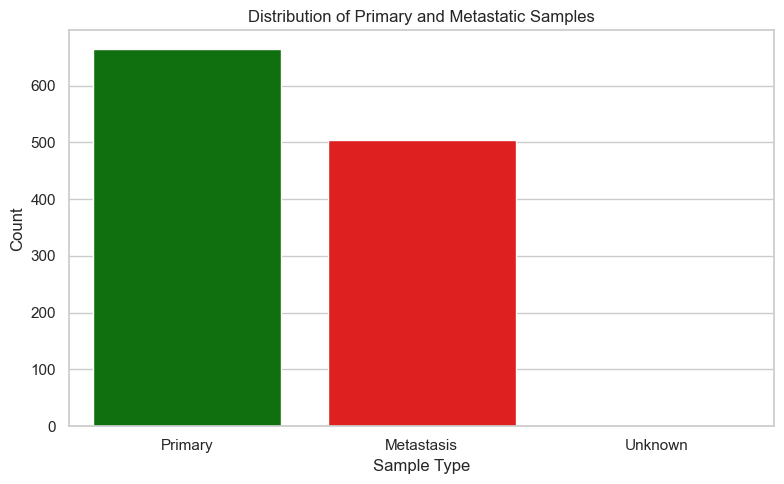

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(x=c_type.index, y=c_type.values, palette=['green', 'red'])
plt.title("Distribution of Primary and Metastatic Samples")
plt.xlabel("Sample Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

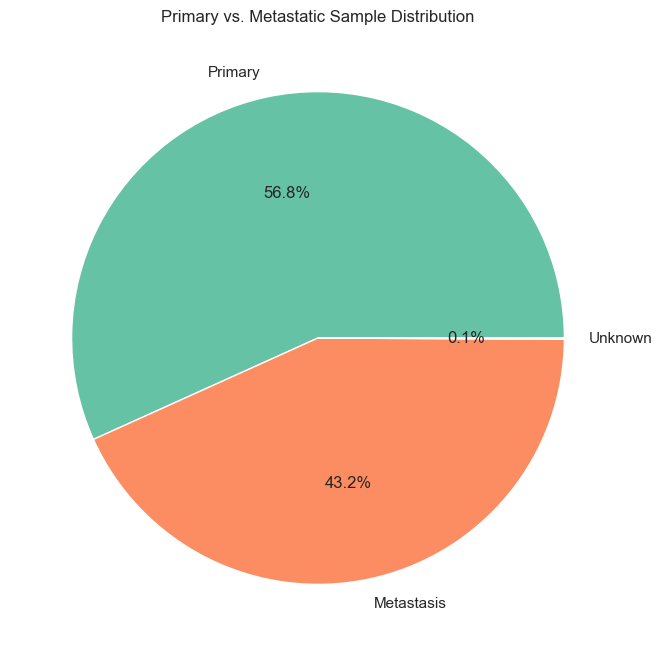

In [47]:
plt.figure(figsize=(8, 8))
c_type.plot.pie(autopct='%1.1f%%', colors=["#66c2a5", "#fc8d62"])
plt.title("Primary vs. Metastatic Sample Distribution")
plt.ylabel("")
plt.show()


In [45]:
tissue_counts = metadata['sample_collection_site'].value_counts()

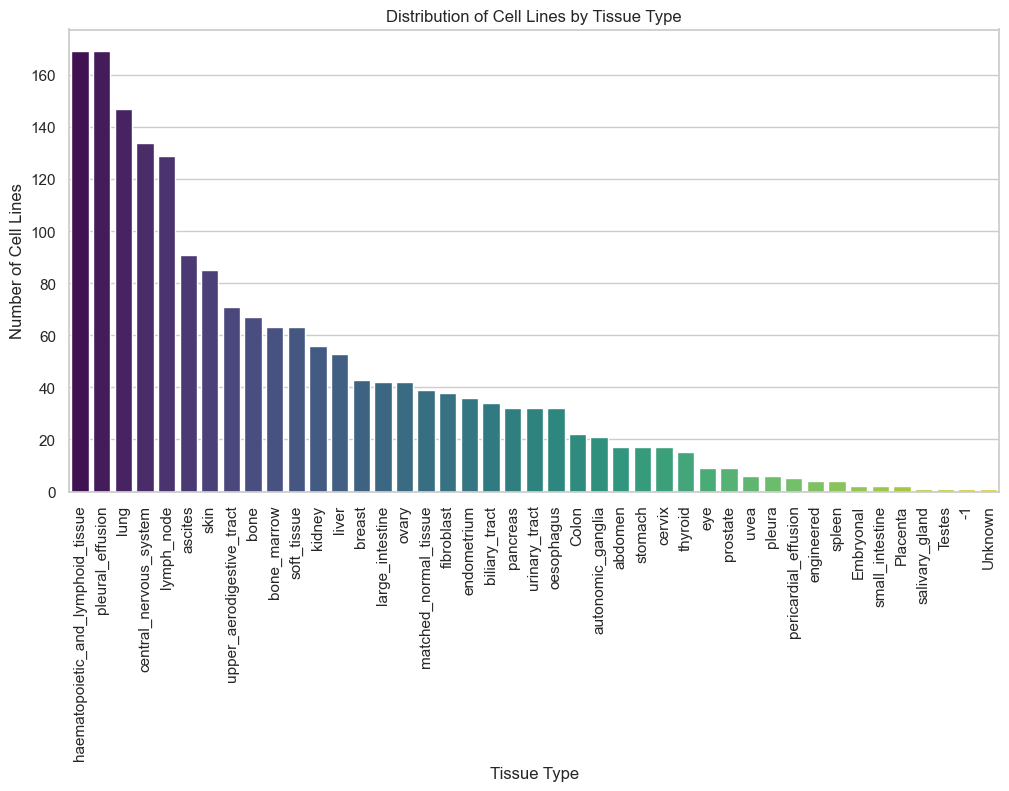

In [46]:
# tissue type distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=tissue_counts.index, y=tissue_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribution of Cell Lines by Tissue Type")
plt.ylabel("Number of Cell Lines")
plt.xlabel("Tissue Type")
plt.show()


In [60]:

expression_data = pd.read_csv("CCLE_expression.csv")
expression_data.columns.values[0] = 'DepMap_ID'
print("Expression Data Dimensions: ", expression_data.shape)
print(expression_data.head())

Expression Data Dimensions:  (1393, 19178)
    DepMap_ID  TSPAN6 (7105)  TNMD (64102)  DPM1 (8813)  SCYL3 (57147)  \
0  ACH-001113       4.990501      0.000000     7.273702       2.765535   
1  ACH-001289       5.209843      0.545968     7.070604       2.538538   
2  ACH-001339       3.779260      0.000000     7.346425       2.339137   
3  ACH-001538       5.726831      0.000000     7.086189       2.543496   
4  ACH-000242       7.465648      0.000000     6.435462       2.414136   

   C1orf112 (55732)  FGR (2268)  CFH (3075)  FUCA2 (2519)  GCLC (2729)  ...  \
0          4.480265    0.028569    1.269033      3.058316     6.483171  ...   
1          3.510962    0.000000    0.176323      3.836934     4.200850  ...   
2          4.254745    0.056584    1.339137      6.724241     3.671293  ...   
3          3.102658    0.000000    5.914565      6.099716     4.475733  ...   
4          3.864929    0.831877    7.198003      5.452530     7.112492  ...   

   ARHGAP11B (89839)  AC004593.2 (112

In [61]:
expression_data.set_index(expression_data.columns[0], inplace=True)
 
print(expression_data.head())

            TSPAN6 (7105)  TNMD (64102)  DPM1 (8813)  SCYL3 (57147)  \
DepMap_ID                                                             
ACH-001113       4.990501      0.000000     7.273702       2.765535   
ACH-001289       5.209843      0.545968     7.070604       2.538538   
ACH-001339       3.779260      0.000000     7.346425       2.339137   
ACH-001538       5.726831      0.000000     7.086189       2.543496   
ACH-000242       7.465648      0.000000     6.435462       2.414136   

            C1orf112 (55732)  FGR (2268)  CFH (3075)  FUCA2 (2519)  \
DepMap_ID                                                            
ACH-001113          4.480265    0.028569    1.269033      3.058316   
ACH-001289          3.510962    0.000000    0.176323      3.836934   
ACH-001339          4.254745    0.056584    1.339137      6.724241   
ACH-001538          3.102658    0.000000    5.914565      6.099716   
ACH-000242          3.864929    0.831877    7.198003      5.452530   

           

In [62]:
from scipy.stats import zscore


gene_variances = expression_data.var(axis=0)

top_genes = gene_variances.nlargest(50).index

top_expression_data = expression_data[top_genes]
standardized_data = top_expression_data.apply(zscore)


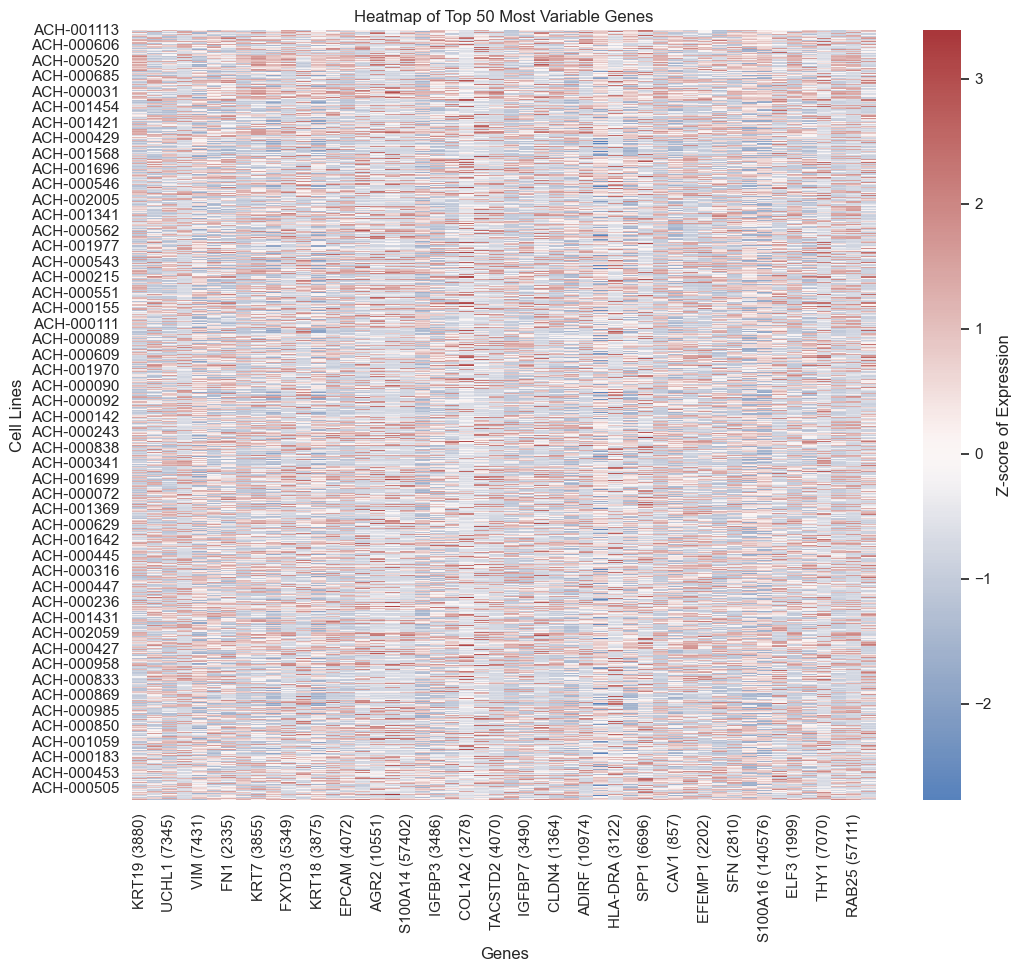

In [63]:
# heatmap for top 50 most variable genes
plt.figure(figsize=(12, 10))
sns.heatmap(standardized_data, cmap="vlag", center=0, cbar_kws={'label': 'Z-score of Expression'})
plt.title("Heatmap of Top 50 Most Variable Genes")
plt.xlabel("Genes")
plt.ylabel("Cell Lines")
plt.show()


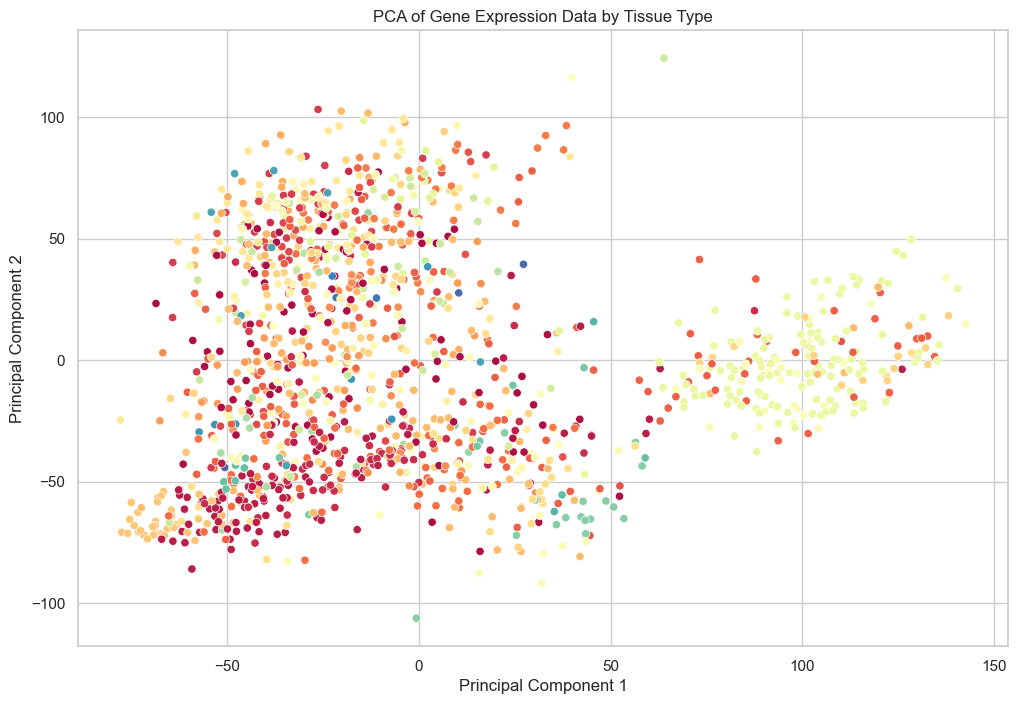

In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(expression_data)


pca_df = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"], index=expression_data.index)
pca_df = pca_df.merge(metadata[['sample_collection_site']], left_index=True, right_on=metadata['DepMap_ID'])


plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="sample_collection_site", palette="Spectral", legend=None)
plt.title("PCA of Gene Expression Data by Tissue Type")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


                 PCA1       PCA2  sample_collection_site
DepMap_ID                                               
ACH-001113 -19.064039  -4.482302                    lung
ACH-001289  17.652105 -53.336776  central_nervous_system
ACH-001339 -20.365559 -39.744384                    skin
ACH-001538 -26.461035  65.962478           biliary_tract
ACH-000242 -12.286414  52.901974           urinary_tract


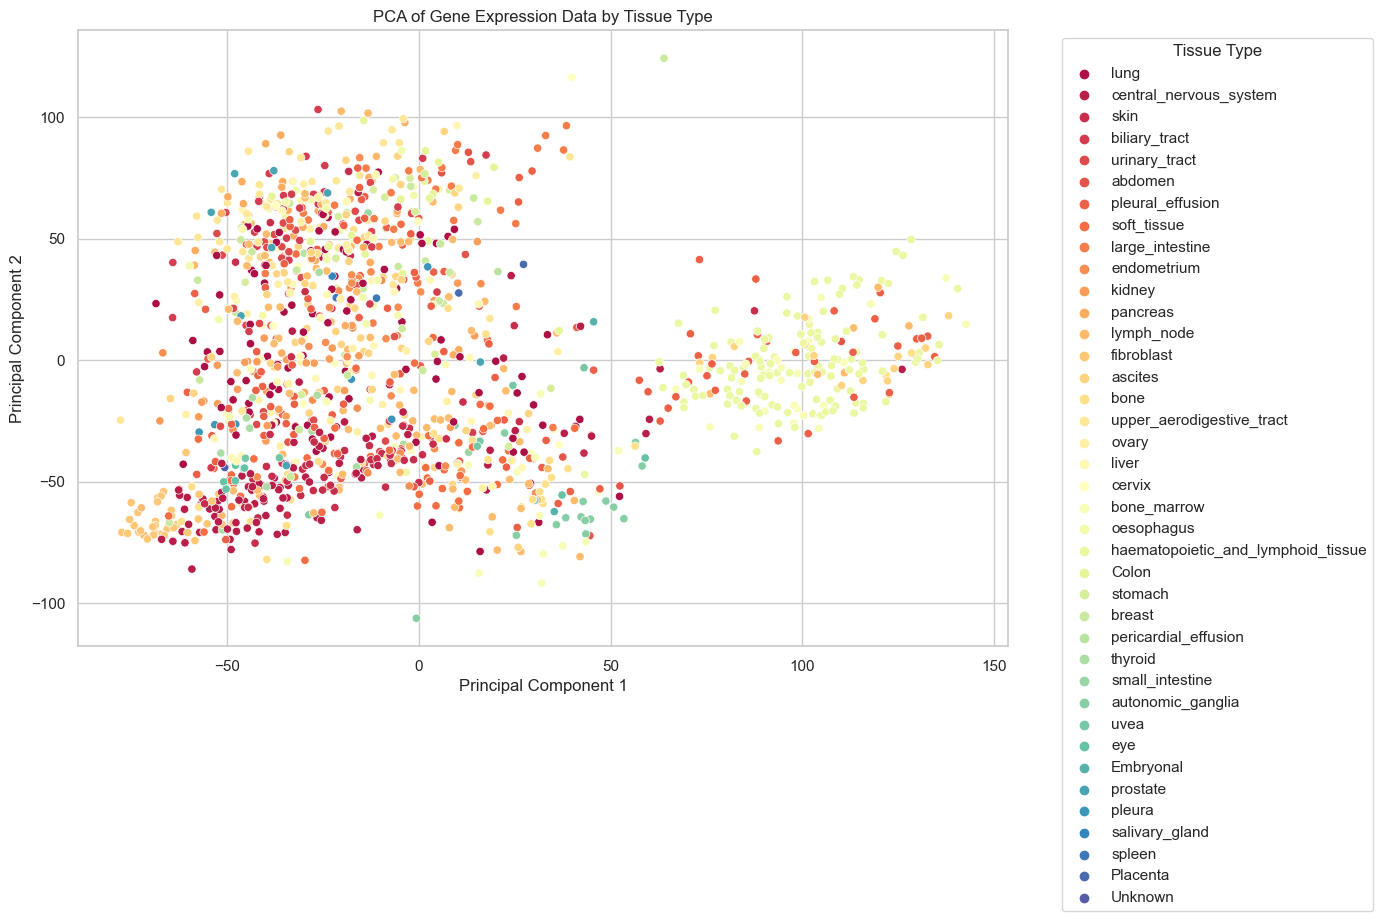

In [91]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(expression_data)

pca_df_tissue = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"], index=expression_data.index)

metadata_subset = metadata.set_index('DepMap_ID')

pca_with_metadata = pca_df_tissue.merge(metadata_subset[['sample_collection_site']], left_index=True, right_index=True)

print(pca_with_metadata.head())

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=pca_with_metadata,
    x="PCA1",
    y="PCA2",
    hue="sample_collection_site",
    palette="Spectral",
    legend="full"
)

handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title="Tissue Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("PCA of Gene Expression Data by Tissue Type")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [72]:
print(expression_data.index)
print(metadata['DepMap_ID'])

Index(['ACH-001113', 'ACH-001289', 'ACH-001339', 'ACH-001538', 'ACH-000242',
       'ACH-000708', 'ACH-000327', 'ACH-000233', 'ACH-000461', 'ACH-000705',
       ...
       'ACH-000402', 'ACH-001578', 'ACH-000036', 'ACH-000973', 'ACH-001128',
       'ACH-000750', 'ACH-000285', 'ACH-001858', 'ACH-001997', 'ACH-000052'],
      dtype='object', name='DepMap_ID', length=1393)
0       ACH-000001
1       ACH-000002
2       ACH-000003
3       ACH-000004
4       ACH-000005
           ...    
1824    ACH-002659
1825    ACH-002687
1826    ACH-002800
1827    ACH-002874
1828    ACH-002875
Name: DepMap_ID, Length: 1829, dtype: object


In [73]:
result = (
    metadata.groupby("primary_or_metastasis")["DepMap_ID"]
    .nunique()
    .reset_index()
    .rename(columns={"DepMap_ID": "Samples"})
    .sort_values(by="Samples", ascending=False)
)

print(result)


  primary_or_metastasis  Samples
1               Primary      664
0            Metastasis      505
2               Unknown        1


In [83]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  
age_labels = ["1-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"] 

metadata["AgeGroup"] = pd.cut(metadata["age"], bins=age_bins, labels=age_labels, right=True)

agegroups = (
    metadata.groupby("AgeGroup")["DepMap_ID"]
    .nunique()
    .reset_index()
    .rename(columns={"DepMap_ID": "SamplesPerAgeGroup"})
)

print(agegroups)

  AgeGroup  SamplesPerAgeGroup
0     1-10                  83
1    11-20                  66
2    21-30                  54
3    31-40                  86
4    41-50                 170
5    51-60                 238
6    61-70                 233
7    71-80                  98
8    81-90                  15
9   91-100                   1


C:\Users\dimim\AppData\Local\Temp\ipykernel_20444\1411913134.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metadata.groupby("AgeGroup")["DepMap_ID"]


In [85]:
# CHECK FOR DUPLICATES
# IF DATAFRAME IS EMPTY THEN NO DUPLICATES


duplicates = (
    metadata.groupby("DepMap_ID")
    .size()  
    .reset_index(name="Count")  
    .query("Count > 1")  
    .sort_values(by="Count", ascending=False) 
)

print(duplicates)

Empty DataFrame
Columns: [DepMap_ID, Count]
Index: []


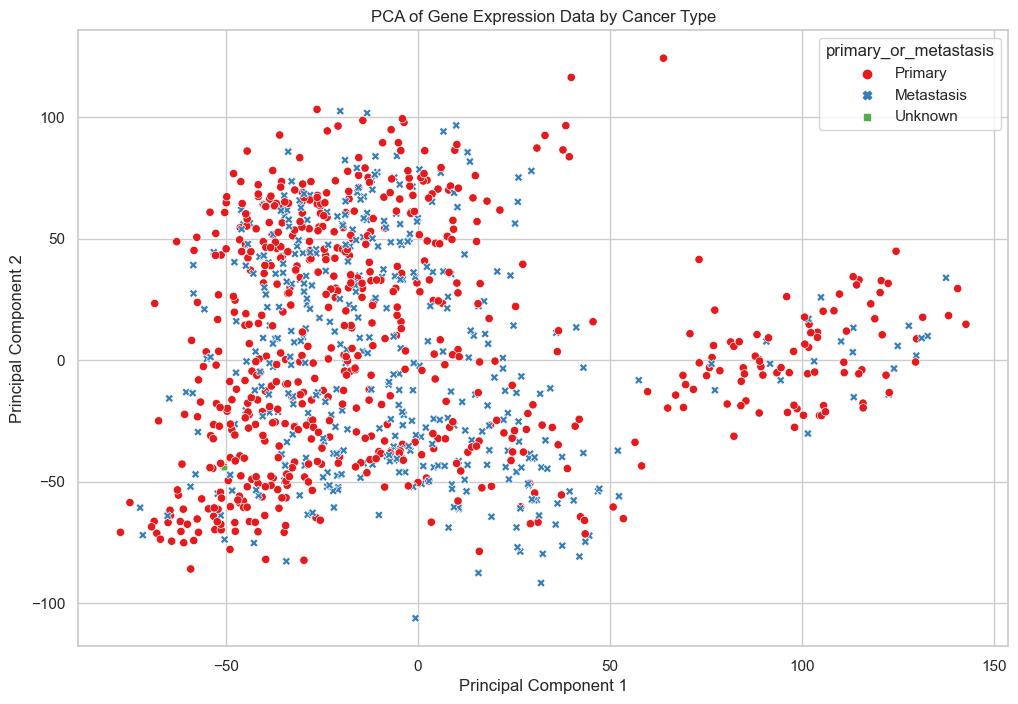

In [90]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load expression and metadata (replace with your data)
# Assume `expression_data` is a DataFrame with genes as columns and rows as cell lines
# Assume `metadata` contains a "Cancer_Type" column with values "Primary" or "Metastasis"

# Merge metadata into the expression data for easy grouping
expression_metadata = expression_data.copy()
expression_metadata["primary_or_metastasis"] = metadata.set_index("DepMap_ID").loc[expression_data.index, "primary_or_metastasis"]

# PCA computation
pca = PCA(n_components=2)
pca_result = pca.fit_transform(expression_data)

# Create a DataFrame for PCA results
pca_df_type = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"], index=expression_data.index)
pca_df_type["primary_or_metastasis"] = expression_metadata["primary_or_metastasis"]

# Plot PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=pca_df_type,
    x="PCA1",
    y="PCA2",
    hue="primary_or_metastasis",
    style="primary_or_metastasis",
    palette="Set1"
)
plt.title("PCA of Gene Expression Data by Cancer Type")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="primary_or_metastasis")
plt.savefig("PCA of Gene Expression data by cancer type")
plt.show()


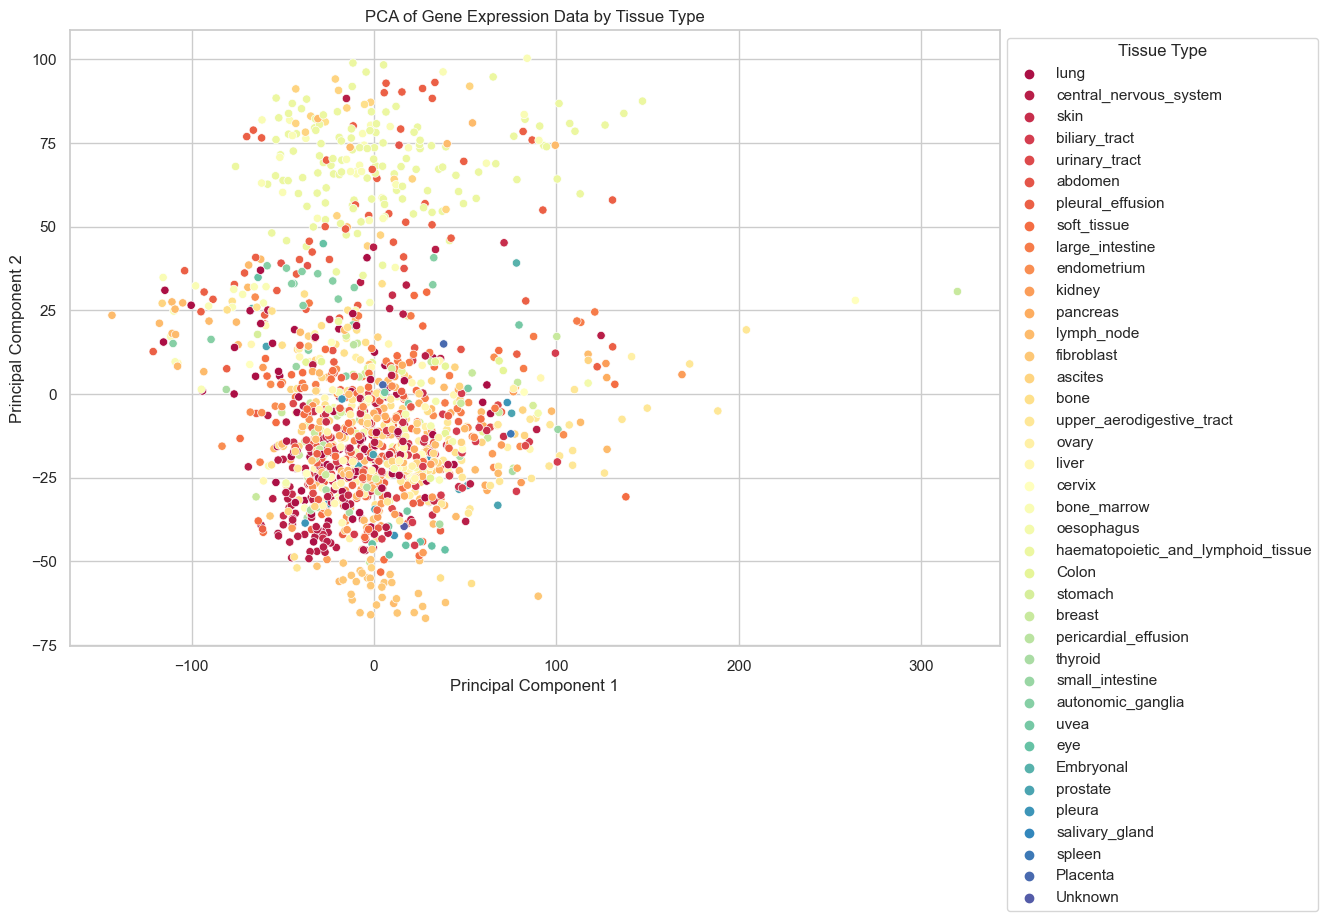

C:\Users\dimim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dimim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


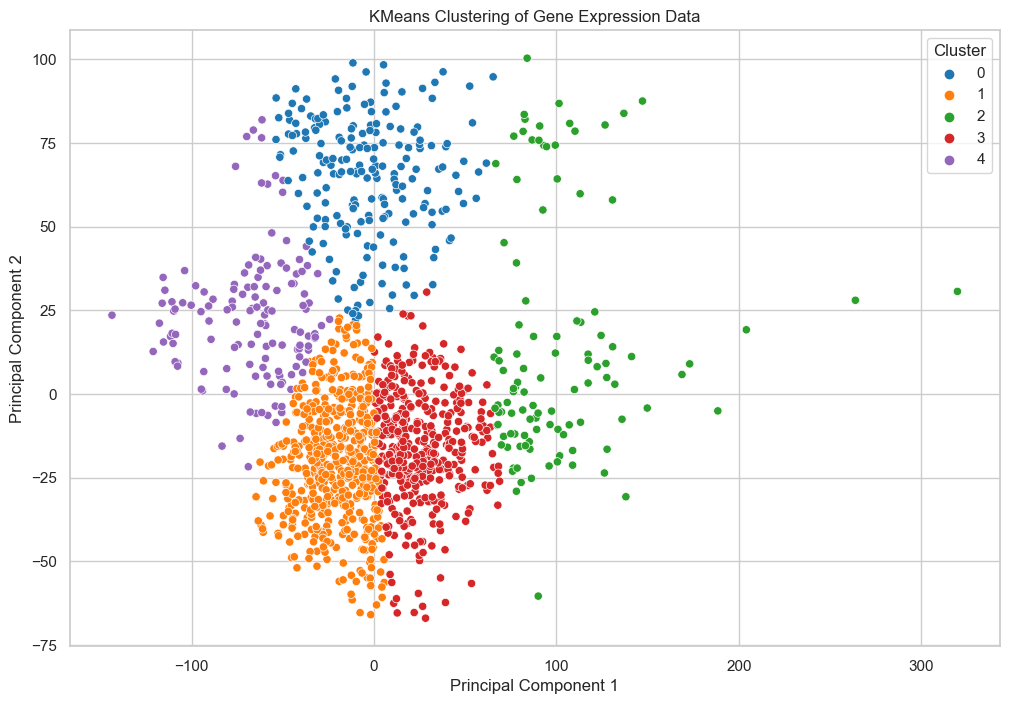

In [100]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
expression_scaled = scaler.fit_transform(expression_data)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(expression_scaled)

pca_df = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"], index=expression_data.index)
pca_df = pca_df.merge(metadata[['sample_collection_site']], left_index=True, right_on=metadata['DepMap_ID'])

plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="sample_collection_site", palette="Spectral")
plt.title("PCA of Gene Expression Data by Tissue Type")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Tissue Type", bbox_to_anchor=(1, 1))
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_result)

pca_df['Cluster'] = clusters

plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Cluster", palette="tab10")
plt.title("KMeans Clustering of Gene Expression Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1, 1))
plt.show()
